# Machine Learning - Tarea 2
---

---

<div style="text-align: right">
Vicente Lizana - 201310004-K
</div>
<div style="text-align: right">
Álvaro Valderrama - 201390005-4
</div>

---

In [1]:
import re
import nltk

import numpy as np
import pandas as pd
import seaborn as sns

from numpy import random as rnd
from urllib import request as req
from matplotlib import pyplot as plt

from sklearn import preprocessing as skpp
from sklearn import decomposition as skdc
from sklearn import discriminant_analysis as skda
from sklearn import neighbors as skng
from sklearn import metrics as skmt
from sklearn import naive_bayes as sknb
from sklearn import svm as sksvm
from sklearn import model_selection as skms
from sklearn import linear_model as sklm
from sklearn.feature_extraction import text as sktx

from imblearn import over_sampling as imbos

from nltk import corpus as nlcp
from nltk.stem import porter as nlpt

---

---
## 1.- Reducción de Dimensionalidad para Clasificación

---
### 1.a

#### Datos

In [2]:
train_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.train"
test_data_url = "http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/vowel.test"
train_data_f = req.urlretrieve(train_data_url, "train_data_1.csv")
test_data_f = req.urlretrieve(test_data_url, "test_data_1.csv")
train_df_1 = pd.DataFrame.from_csv('train_data_1.csv',header=0,index_col=0)
test_df_1 = pd.DataFrame.from_csv('test_data_1.csv',header=0,index_col=0)

In [3]:
n_train = train_df_1.shape[0]
print("Cantidad de datos (train) :", n_train)
train_df_1.head()

Cantidad de datos (train) : 528


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [4]:
n_test = test_df_1.shape[0]
print("Cantidad de datos (test) :", n_test)
test_df_1.tail()

Cantidad de datos (test) : 462


,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
458,7,-3.239,3.083,-1.427,-0.202,-0.282,1.421,0.576,0.068,-0.914,0.147
459,8,-3.753,3.605,-0.899,-0.747,-0.401,1.765,0.620,0.754,-0.835,-0.301
460,9,-3.980,2.459,0.068,0.023,0.237,1.029,-0.189,0.521,-0.773,-0.500
461,10,-4.264,2.925,0.065,0.794,0.323,0.515,-1.282,-0.140,-0.863,-0.390
462,11,-3.291,2.324,-0.679,0.285,0.441,0.557,-0.227,0.115,-1.046,0.697


El conjunto de entrenamiento tiene 528 datos y el conjunto de prueba tiene 462. Cada dato tiene 10 atributos.

In [5]:
for i in range(1, 12):
    n_class = train_df_1[train_df_1["y"]==i].shape[0]
    print("Promedio Clase {:<2}: {}".format(i, n_class/n_train))

Promedio Clase 1 : 0.09090909090909091
Promedio Clase 2 : 0.09090909090909091
Promedio Clase 3 : 0.09090909090909091
Promedio Clase 4 : 0.09090909090909091
Promedio Clase 5 : 0.09090909090909091
Promedio Clase 6 : 0.09090909090909091
Promedio Clase 7 : 0.09090909090909091
Promedio Clase 8 : 0.09090909090909091
Promedio Clase 9 : 0.09090909090909091
Promedio Clase 10: 0.09090909090909091
Promedio Clase 11: 0.09090909090909091


Todas las clases tienen la misma proporción $\left(\frac{1}{11}\right)$, por lo que los datos están equirepresentados.

---
### 1.b

#### Preprocesamiento

In [6]:
X_1 = train_df_1.loc[:,'x.1':'x.10'].values
y_1 = train_df_1.loc[:,'y'].values

sscaler = skpp.StandardScaler().fit(X_1)
X_1_std = sscaler.transform(X_1)

---
### 1.c

#### PCA (not even once)

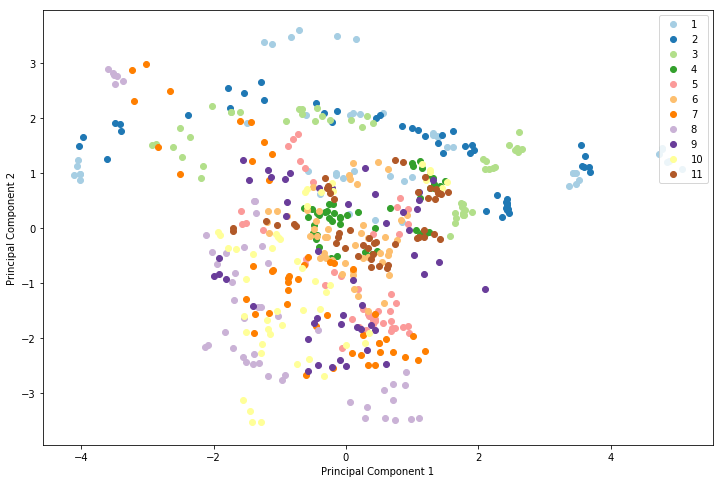

In [7]:
sklearn_pca = skdc.PCA(n_components=2)
Xred_pca = sklearn_pca.fit_transform(X_1_std)

paired_cmap = plt.cm.get_cmap('Paired')
mclasses=(1,2,3,4,5,6,7,8,9,10,11)
mcolors = [paired_cmap(i) for i in np.linspace(0,1,11)]

plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_pca[y_1==lab, 0],Xred_pca[y_1==lab, 1],label=lab,c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

---
### 1.d

#### LDA

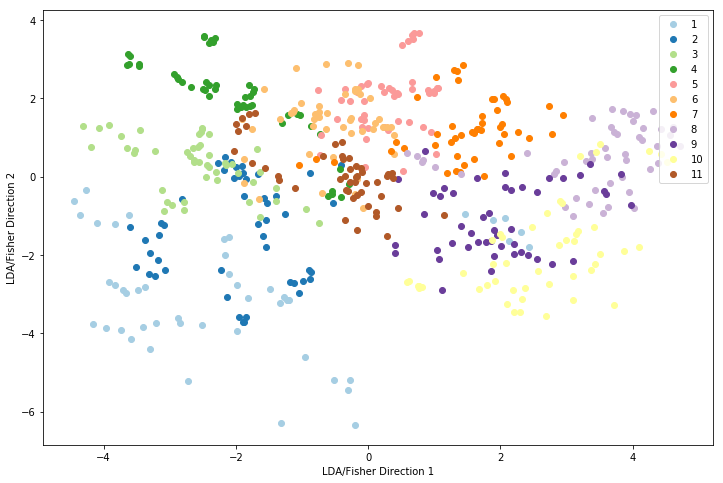

In [8]:
sklearn_lda = skda.LinearDiscriminantAnalysis(n_components=2)
Xred_lda = sklearn_lda.fit_transform(X_1_std,y_1)

plt.figure(figsize=(12, 8))
for lab, col in zip(mclasses,mcolors):
    plt.scatter(Xred_lda[y_1==lab, 0],Xred_lda[y_1==lab, 1],label=lab,c=col)
plt.xlabel('LDA/Fisher Direction 1')
plt.ylabel('LDA/Fisher Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

---
### 1.e

#### Comparación Cualitativa

De los gráficos podemos ver que si particionaramos el espacio en distintas regiones correspondientes a las diferentes clases, con _LDA_ tendríamos menos elementos mal clasificados que con _PCA_, ya que la superposición de elementos de diferentes clases es mucho menor.

Aparte, graficando los centros de gravedad de cada cluster, podemos ver que tan separadas quedan las clases.

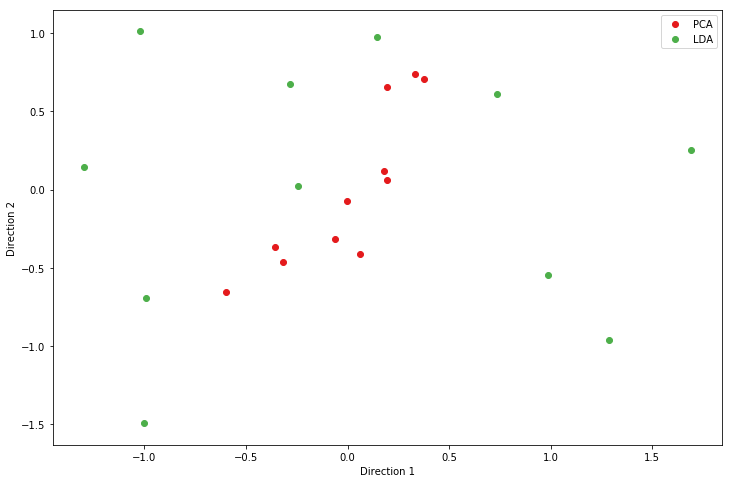

In [9]:
centers_pca = []
centers_lda = []

for lab in mclasses:
    centers_pca.append( np.sum(Xred_pca[y_1==lab], axis=0) /Xred_pca[y_1==lab].size )
    centers_lda.append( np.sum(Xred_lda[y_1==lab], axis=0) /Xred_lda[y_1==lab].size )
    
centers_pca = np.array(centers_pca)
centers_lda = np.array(centers_lda)

Set1_cmap = plt.cm.get_cmap('Set1')
green = Set1_cmap(0.25)
red = Set1_cmap(0)

plt.figure(figsize=(12, 8))
plt.scatter(centers_pca[:,0],centers_pca[:,1],label="PCA",c=red)
plt.scatter(centers_lda[:,0],centers_lda[:,1],label="LDA",c=green)
plt.xlabel('Direction 1')
plt.ylabel('Direction 2')
leg = plt.legend(loc='upper right', fancybox=True)
plt.show()

Podemos ver que los centros de _PCA_ se encuentran en una región mucho más acotada que los de _LDA_, lo cual no es deseable ya que si están más separados hay menos superposición.

---
### 1.f

#### Clasificador Aleatorio

In [112]:
# X_1_std.shape[0]
def random_classifier(x):
    return rnd.randint(1, 12, size=x.shape[0])

print("Porcentaje de acierto : ", y_1[(random_classifier(X_1) - y_1) == 0].size / y_1.size * 100)
print("Valor referencial     : ", 100/11)

Porcentaje de acierto :  8.901515151515152
Valor referencial     :  9.090909090909092


Se espera que la tasa de aciertos sea aproximadamente $\frac{1}{11}$, ya que para cada uno de los datos, el clasificador tiene por construcción una probabilidad de $\frac{1}{11}$ de acertar la clase correcta a la que pertenece el dato.

---
### 1.g

#### LDA - QDA - Vecinos más Cercanos

LDA:
train score:  0.683712121212
test score :  0.443722943723

QDA:
train score:  0.988636363636
test score :  0.471861471861

KNN:
max train score: (k=1) 1.0
max test score : (k=7) 0.5194805194805194
test score k=7 : 0.9640151515151515


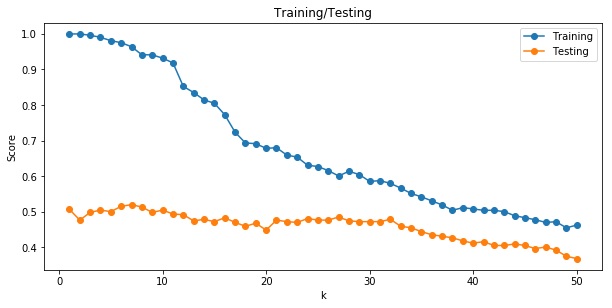

In [120]:
X_1_test = test_df_1.loc[:,'x.1':'x.10'].values
y_1_test = test_df_1.loc[:,'y'].values
X_1_std_test = sscaler.transform(X_1_test)

lda_model = skda.LinearDiscriminantAnalysis()
lda_model.fit(X_1_std,y_1)

print("LDA:")
print("train score: ", lda_model.score(X_1_std,y_1))
print("test score : ", lda_model.score(X_1_std_test,y_1_test))
print()

qda_model = skda.QuadraticDiscriminantAnalysis()
qda_model.fit(X_1_std,y_1)

print("QDA:")
print("train score: ", qda_model.score(X_1_std,y_1))
print("test score : ", qda_model.score(X_1_std_test,y_1_test))
print()

print("KNN:")
knn_scores_training = []
knn_scores_testing = []

k = range(1,51)
for c in k:
    knn_model = skng.KNeighborsClassifier(n_neighbors=c)
    knn_model.fit(X_1_std,y_1)
    knn_scores_training.append(knn_model.score(X_1_std,y_1))
    knn_scores_testing.append(knn_model.score(X_1_std_test,y_1_test))


print("max train score: (k={}) {}".format(np.argmax(knn_scores_training)+1, max(knn_scores_training)))
print("max test score : (k={}) {}".format(np.argmax(knn_scores_testing)+1, max(knn_scores_testing)))
print("test score k=7 : {}".format(knn_scores_training[6]))
    
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Training/Testing")
plt.plot(k,knn_scores_training, '-o',k,knn_scores_testing, '-o')
plt.legend(("Training", "Testing"), loc = "upper right")
plt.show()

* Sobre el conjunto de entrenamiento se comporta mejor _QDA_, excepto cuando _KNN_ usa un $k$ muy bajo, sin embargo esto no es tan deseable ya que podría existir _underfitting_.
* Sobre el conjunto de prueba el mejor es _KNN_ con $k=6$.
* Para $k$ grandes, _KNN_ podemos ver que el error en el _Train Set_ se acerca al error del _Test Set_, sin embargo a partir de cierto punto ámbos comienzan a decaer. Esto se debe a que se comienzan a considerar vecinos no tan cercanos, que alteran el resultado. Debido al tamaño de la muestra, 50 vecinos es un porcentaje demasiado significativo de la muestra. 
* Para $k$ pequeños el error es muy pequeño en el _Train Set_ pero no así en el _Test Set_.

---
### 1.h

#### PCA Again

In [143]:
lda_scores_pca = np.zeros((2,10))
qda_scores_pca = np.zeros((2,10))
knn_scores_pca = np.zeros((3,10))

for dim in range(10):
    current_pca = skdc.PCA(n_components=dim+1).fit(X_1_std)
    Xc_train_pca = current_pca.transform(X_1_std)
    Xc_test_pca = current_pca.transform(X_1_std_test)
    
    # LDA
    lda_model = skda.LinearDiscriminantAnalysis()
    lda_model.fit(Xc_train_pca,y_1)
    lda_scores_pca[:,dim] = np.array([
        lda_model.score(Xc_train_pca, y_1),
        lda_model.score(Xc_test_pca, y_1_test)
    ])
    
    # QDA
    qda_model = skda.QuadraticDiscriminantAnalysis()
    qda_model.fit(Xc_train_pca,y_1)
    qda_scores_pca[:,dim] = np.array([
        qda_model.score(Xc_train_pca, y_1),
        qda_model.score(Xc_test_pca, y_1_test)
    ])
    
    # KNN
    knn_scores_training = []
    knn_scores_testing = []

    k = range(1,31)
    for c in k:
        knn_model = skng.KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(Xc_train_pca,y_1)
        knn_scores_training.append(knn_model.score(Xc_train_pca,y_1))
        knn_scores_testing.append(knn_model.score(Xc_test_pca,y_1_test))
        
    best_k = np.argmax(knn_scores_testing)
    knn_scores_pca[:,dim] = np.array([
        knn_scores_training[best_k],
        knn_scores_testing[best_k],
        best_k + 1
    ])

best k :  [ 15.  13.   1.   1.  12.   6.   2.   1.   6.   7.]


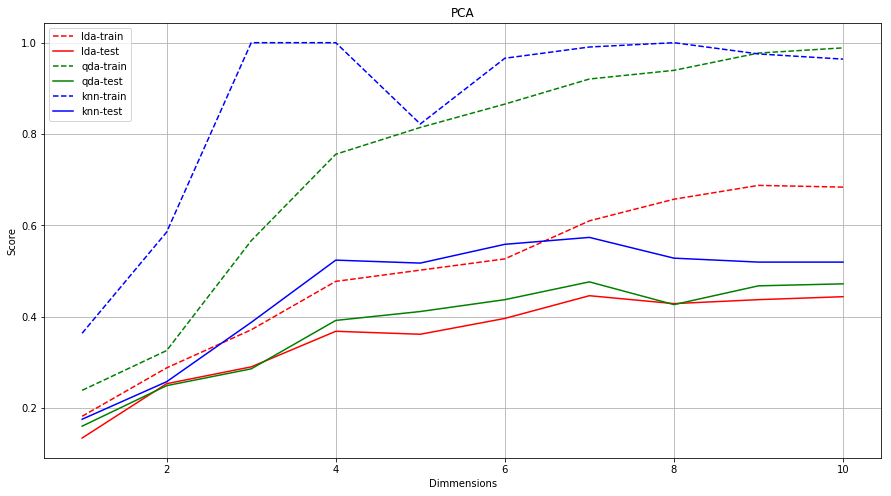

In [156]:
print("best k : ", knn_scores_pca[2,:])
plt.figure(figsize=(15,8))
plt.plot(range(1,11), lda_scores_pca[0,:], '--r', label="lda-train")
plt.plot(range(1,11), lda_scores_pca[1,:], '-r', label="lda-test")
plt.plot(range(1,11), qda_scores_pca[0,:], '--g', label="qda-train")
plt.plot(range(1,11), qda_scores_pca[1,:], '-g', label="qda-test")
plt.plot(range(1,11), knn_scores_pca[0,:], '--b', label="knn-train")
plt.plot(range(1,11), knn_scores_pca[1,:], '-b', label="knn-test")
plt.title("PCA")
plt.ylabel("Score")
plt.xlabel("Dimmensions")
plt.legend()
plt.grid()
plt.show()

---
### 1.i

#### LDA

In [162]:
lda_scores_lda = np.zeros((2,10))
qda_scores_lda = np.zeros((2,10))
knn_scores_lda = np.zeros((3,10))

for dim in range(10):
    current_lda = skda.LinearDiscriminantAnalysis(n_components=dim+1).fit(X_1_std, y_1)
    Xc_train_lda = current_lda.transform(X_1_std)
    Xc_test_lda = current_lda.transform(X_1_std_test)
    
    # LDA
    lda_model = skda.LinearDiscriminantAnalysis()
    lda_model.fit(Xc_train_lda,y_1)
    lda_scores_lda[:,dim] = np.array([
        lda_model.score(Xc_train_lda, y_1),
        lda_model.score(Xc_test_lda, y_1_test)
    ])
    
    # QDA
    qda_model = skda.QuadraticDiscriminantAnalysis()
    qda_model.fit(Xc_train_lda,y_1)
    qda_scores_lda[:,dim] = np.array([
        qda_model.score(Xc_train_lda, y_1),
        qda_model.score(Xc_test_lda, y_1_test)
    ])
    
    # KNN
    knn_scores_training = []
    knn_scores_testing = []

    k = range(1,101)
    for c in k:
        knn_model = skng.KNeighborsClassifier(n_neighbors=c)
        knn_model.fit(Xc_train_lda,y_1)
        knn_scores_training.append(knn_model.score(Xc_train_lda,y_1))
        knn_scores_testing.append(knn_model.score(Xc_test_lda,y_1_test))
        
    best_k = np.argmax(knn_scores_testing)
    knn_scores_lda[:,dim] = np.array([
        knn_scores_training[best_k],
        knn_scores_testing[best_k],
        best_k + 1
    ])

best k :  [ 40.  33.  73.  62.  44.  70.  69.  58.   1.   9.]


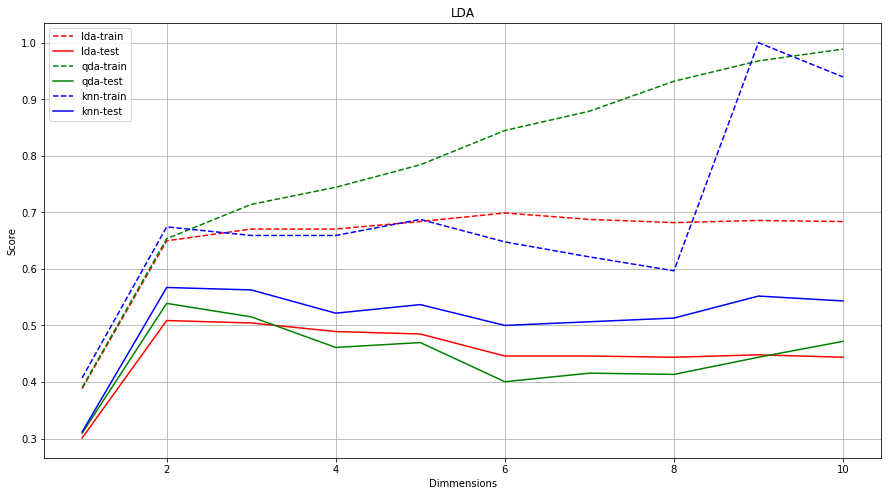

In [163]:
print("best k : ", knn_scores_lda[2,:])
plt.figure(figsize=(15,8))
plt.plot(range(1,11), lda_scores_lda[0,:], '--r', label="lda-train")
plt.plot(range(1,11), lda_scores_lda[1,:], '-r', label="lda-test")
plt.plot(range(1,11), qda_scores_lda[0,:], '--g', label="qda-train")
plt.plot(range(1,11), qda_scores_lda[1,:], '-g', label="qda-test")
plt.plot(range(1,11), knn_scores_lda[0,:], '--b', label="knn-train")
plt.plot(range(1,11), knn_scores_lda[1,:], '-b', label="knn-test")
plt.title("LDA")
plt.ylabel("Score")
plt.xlabel("Dimmensions")
plt.legend()
plt.grid()
plt.show()

---

---
## 2.- Análisis de Opiniones sobre Películas

---
### 2.a

#### Datos

In [11]:
train_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.train"
test_data_url = "http://www.inf.utfsm.cl/~jnancu/stanford-subset/polarity.dev"

train_data_f = req.urlretrieve(train_data_url, "train_data_2.csv")
test_data_f = req.urlretrieve(test_data_url, "test_data_2.csv")

with open("train_data_2.csv", encoding='ISO-8859-1') as ftr:
    rows = [line.strip().split(" ",1) for line in ftr.readlines()]
    train_df_2 = pd.DataFrame(rows, columns=['Sentiment','Text'])
    train_df_2['Sentiment'] = pd.to_numeric(train_df_2['Sentiment'])

with open("test_data_2.csv", encoding='ISO-8859-1') as fts:
    rows = [line.strip().split(" ",1) for line in fts.readlines()]
    test_df_2 = pd.DataFrame(rows, columns=['Sentiment','Text'])
    test_df_2['Sentiment'] = pd.to_numeric(test_df_2['Sentiment'])

print(train_df_2.shape)
print(test_df_2.shape)

(3554, 2)
(3554, 2)


In [12]:
train_df_2.head()

,Sentiment,Text
0,-1,"everything's serious , poetic , earnest and --..."
1,-1,"narratively , trouble every day is a plodding ..."
2,1,a truly wonderful tale combined with stunning ...
3,1,jason patric and ray liotta make for one splen...
4,-1,haneke keeps us at arm's length . guided more ...


In [13]:
test_df_2.tail()

,Sentiment,Text
3549,1,a fascinating documentary about the long and e...
3550,1,the filmmakers' eye for detail and the high st...
3551,1,throwing caution to the wind with an invitatio...
3552,-1,"a big , baggy , sprawling carnival of a movie..."
3553,1,"an incendiary , deeply thought-provoking look ..."


---
### 2.b

#### Word extractor, Part I

In [14]:
def word_extractor(text):
    ps = nlpt.PorterStemmer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [ps.stem(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [15]:
print(word_extractor("I love to eat cake"))
print(word_extractor("I love eating cake"))
print(word_extractor("I loved eating the cake"))
print(word_extractor("I do not love eating cake"))
print(word_extractor("I don't love eating cake"))

love eat cake
love eat cake
love eat cake
not love eat cake
n't love eat cake


---
### 2.c

#### Word extractor, Part II

In [16]:
def word_extractor2(text):
    wordlemmatizer = nltk.WordNetLemmatizer()
    commonwords = nlcp.stopwords.words('english')
    commonwords.remove('not')
    
    text = re.sub(r'([a-z])\1+', r'\1\1', text)
    words = []
    wordtokens = [wordlemmatizer.lemmatize(word.lower()) for word in nltk.word_tokenize(text)]
    
    for word in wordtokens:
        if word not in commonwords:
            words.append(word)
            
    return " ".join(words)

In [17]:
print(word_extractor2("I love to eat cake"))
print(word_extractor2("I love eating cake"))
print(word_extractor2("I loved eating the cake"))
print(word_extractor2("I do not love eating cake"))
print(word_extractor2("I don't love eating cake"))

love eat cake
love eating cake
loved eating cake
not love eating cake
n't love eating cake


---
### 2.d

#### Representación vectorial de los datos

In [18]:
texts_train = [word_extractor2(text) for text in train_df_2.Text]
texts_test = [word_extractor2(text) for text in test_df_2.Text]

vectorizer = sktx.CountVectorizer(ngram_range=(1, 1), binary='False')
vectorizer.fit(np.asarray(texts_train))

features_train = vectorizer.transform(texts_train)
features_test = vectorizer.transform(texts_test)

labels_train = np.asarray((train_df_2.Sentiment.astype(float)+1)/2.0)
labels_test = np.asarray((test_df_2.Sentiment.astype(float)+1)/2.0)

vocab = vectorizer.get_feature_names()
dist = list(np.array(features_train.sum(axis=0)).reshape(-1,))

for tag, count in zip(vocab, dist):
    print(count, tag)

6 10
4 100
2 101
1 105
2 10th
4 11
2 110
1 11th
1 12
2 13
1 13th
1 14
1 140
1 146
3 15
1 16
1 163
2 170
1 18th
4 19
2 1915
1 1934
1 1938
1 1940s
2 1950
1 1950s
1 1954
1 1955
1 1958
1 1959
2 1960s
1 1967
1 1972
3 1975
1 1978
1 1979
2 1980
1 1991
1 1992
2 1995
3 19th
4 20
2 2000
7 2002
4 20th
2 21st
1 22
1 24
2 25
1 25s
2 30
1 300
2 3000
1 30s
1 37
1 3d
5 40
1 400
1 401
1 40s
1 451
1 48
1 49
4 4ever
3 50
2 51
1 53
1 5ths
2 60s
1 65
1 65th
4 70s
1 71
1 77
1 78
1 79
4 80
1 800
3 80s
2 84
2 85
1 88
1 8th
13 90
1 90s
1 93
1 94
2 95
1 96
1 97
2 99
1 aaliyah
2 abandon
1 abandono
1 abbass
1 abbreviated
1 abc
2 abel
1 abhorrent
1 abiding
11 ability
6 able
3 ably
1 aboul
3 above
1 abrahams
1 abrams
1 abrasive
2 abroad
1 abruptly
2 absolute
7 absolutely
1 absorb
1 absorbed
10 absorbing
1 absorption
5 abstract
2 absurd
3 absurdist
4 absurdity
1 absurdly
1 aburrido
4 abuse
1 abysmally
1 acabamos
1 academic
2 academy
7 accent
1 accentuating
2 accept
1 accepting
10 accessible
2 accident
1 accidental
1

1 butt
1 butterfingered
1 butterworth
2 button
6 buy
1 buyers
1 buying
1 buzz
2 buñuel
8 by
1 byatt
1 bygone
2 byler
1 bypass
1 byron
41 ca
1 cabin
3 cable
1 cackle
1 cacophony
1 cacoyannis
1 cada
1 caddyshack
2 caesar
1 cafe
1 caffeinated
1 café
5 cage
1 cahill
7 caine
1 cal
1 calamity
1 calcified
4 calculated
3 calculating
2 caliber
2 calibrated
1 california
17 call
3 callar
7 called
2 calling
1 callow
1 calvin
1 camaraderie
1 camareras
3 came
4 cameo
15 camera
1 cameron
3 camouflage
8 camp
1 campanella
1 campfire
1 campion
1 campus
1 campy
2 canada
1 canadian
2 cancer
1 candidly
1 candle
3 candy
3 canned
2 cannes
1 canning
3 canny
1 canon
2 cantet
4 capable
1 capably
2 capacity
7 caper
1 capitalize
1 capricious
1 capsule
1 captain
1 captivates
2 captivating
1 captivatingly
2 captive
1 captor
15 capture
4 captured
2 capturing
1 capturou
6 car
3 card
1 cardboard
1 cardellini
1 cardoso
25 care
1 cared
1 careen
12 career
2 careful
2 carefully
1 caretaker
1 careworn
3 caricature
2 caring

6 example
2 exasperatingly
1 exceed
2 exceedingly
11 excellent
2 excels
9 except
1 excepting
3 exception
3 exceptional
6 excess
1 excessive
1 excessively
2 excited
9 excitement
5 exciting
1 exclamation
1 exclusively
2 excruciating
5 excuse
5 executed
11 execution
3 executive
1 exemplary
13 exercise
4 exhausting
2 exhibit
1 exhilarated
6 exhilarating
1 exhilaratingly
1 exhuming
1 exibi
2 exist
2 existed
6 existence
2 existential
3 existentialism
2 existing
3 exists
2 exit
2 exotic
1 expanded
2 expands
1 expansion
9 expect
1 expectant
6 expectation
7 expected
1 expedience
29 experience
2 experienced
1 experiment
1 experimental
3 experimentation
2 expertly
2 explain
1 explaining
1 explains
3 explanation
2 explicit
2 explode
4 exploit
4 exploitation
7 exploitative
2 exploiting
1 exploitive
6 exploration
1 explore
2 explored
1 explores
2 exploring
3 explosion
2 expose
3 exposing
3 exposition
1 exposure
1 exposé
1 expounded
1 expresar
1 express
1 expressing
2 expression
1 expressionist
1 exp

3 joan
1 joaquin
10 job
1 jobs
4 joe
3 joel
1 joffé
19 john
1 johnny
1 joined
24 joke
1 joker
2 jolie
1 jolly
1 jolt
3 jolting
1 jon
4 jonah
6 jones
1 jose
1 josef
1 joseph
1 jostle
2 journalism
1 journalist
1 journalistic
1 journalistically
14 journey
1 jovial
1 jovovich
9 joy
3 joyful
2 joyless
1 joão
2 jr
1 judaism
1 judd
3 judge
2 judgment
2 juice
1 juiced
2 julia
2 julianne
1 juliet
1 juliette
5 jump
1 jumpsuit
1 juncture
1 junior
5 junk
1 junkie
1 just
4 justice
1 justifies
2 justify
1 justifying
2 juvenile
1 juwanna
1 juxtaposition
3 kafka
2 kahlo
1 kahn
1 kaige
1 kaleidoscope
1 kaos
7 kapur
1 karmen
1 kasem
2 kathryn
2 katz
5 kaufman
1 kazmierski
3 keen
1 keenest
1 keenly
52 keep
4 keeping
1 keg
1 ken
1 kendall
2 kennedy
1 kenneth
2 kept
2 kevin
11 key
1 ki
1 kibbitzes
5 kick
1 kickass
3 kicking
34 kid
4 kiddie
1 kidlets
2 kidman
1 kidnapper
1 kidnapping
1 kids
1 kieran
1 kieslowski
6 kill
2 killed
8 killer
4 killing
3 kilmer
1 kilner
2 kilt
1 kilted
4 kilter
3 kim
1 kin
52 kin

3 pray
1 prayer
1 praying
3 pre
1 preach
1 preaches
1 preaching
6 preachy
1 preceded
1 preciosista
6 precious
1 preciousness
1 precisa
2 precise
2 precisely
3 precision
1 precollegiate
13 predecessor
2 predict
2 predictability
29 predictable
2 predictably
2 predisposed
1 predominantly
1 prefeminist
4 prefer
1 pregnant
1 prehistoric
1 prejudice
1 prelude
1 premisa
21 premise
1 preoccupation
1 preordained
1 prepackaged
1 preparation
5 preposterous
1 preposterously
1 preprogrammed
1 preschooler
1 prescribed
7 presence
16 present
3 presentation
5 presented
1 preservation
3 press
3 pressed
2 pressure
1 presumes
1 presumption
2 preteen
7 pretend
1 pretense
4 pretension
13 pretentious
1 pretentiously
22 pretty
1 prevails
2 prevent
1 prevention
2 prevents
1 preview
7 previous
1 prewarned
1 prey
7 price
2 priceless
2 pride
1 prim
1 primal
4 primarily
1 primavera
3 prime
1 primer
1 primitive
1 princess
3 principal
2 principle
2 print
1 prism
5 prison
4 prisoner
1 prissy
2 pristine
4 private
2 pr

6 string
2 strip
2 stripped
1 striving
3 stroke
1 stroked
1 stroll
21 strong
2 stronger
2 strongest
2 strongly
1 struck
6 structure
2 structured
1 structuring
6 struggle
1 struggled
1 struggling
1 strung
1 strut
1 strutting
2 stuart
3 stuck
1 studded
4 student
6 studio
1 studiously
25 study
17 stuff
1 stuffy
1 stultifyingly
1 stumble
8 stunning
1 stunningly
10 stunt
1 stupefying
1 stupendous
13 stupid
1 stupider
1 stupidity
1 stuporously
1 sturdy
1 stuttering
34 style
1 styled
1 stylings
5 stylish
2 stylishness
3 stylistic
5 stylized
1 stymied
2 su
1 sua
2 sub
3 subconscious
3 subculture
33 subject
2 sublime
1 sublimely
1 subliminally
2 submarine
1 submerged
1 subordinate
1 subplot
1 subplots
12 substance
1 substantial
1 substitutable
3 substitute
2 subtext
1 subtexts
1 subtitle
1 subtitled
11 subtle
2 subtler
1 subtlest
4 subtlety
3 subtly
1 suburban
1 suburbia
5 subversive
6 succeed
1 succeeded
7 succeeds
8 success
9 successful
1 successfully
2 succession
2 successor
1 succumb
3 succ

---
### 2.e

#### Evaluar el desempeño

In [19]:
def score_the_model(model, x, y, xt, yt, text):
    acc_tr = model.score(x, y)
    acc_test = model.score(xt[:-1], yt[:-1])
    
    print("Train Accuracy {}: {}".format(text, acc_tr))
    print("Test Accuracy {} : {}".format(text, acc_test))
    print("Detailed Analysis Testing Results:")
    print(skmt.classification_report(yt, model.predict(xt), target_names=['+','-']))

---
### 2.f

#### Naive Bayes

In [20]:
def do_NAIVE_BAYES(x, y, xt, yt):
    model = sknb.BernoulliNB()
    model = model.fit(x, y)
    score_the_model(model, x, y, xt, yt, "BernoulliNB")
    return model

In [21]:
model = do_NAIVE_BAYES(features_train, labels_train, features_test, labels_test)
test_pred = model.predict_proba(features_test)
spl = rnd.randint(len(test_pred), size=15)

for text, sentiment in zip(test_df_2.Text[spl], test_pred[spl]):
    print(sentiment, text)

Train Accuracy BernoulliNB: 0.9589195272931907
Test Accuracy BernoulliNB : 0.7379679144385026
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.75      0.72      0.74      1803
          -       0.73      0.75      0.74      1751

avg / total       0.74      0.74      0.74      3554

[ 0.19076864  0.80923136] ryan gosling is , in a word , brilliant as the conflicted daniel .
[ 0.97863391  0.02136609] another one of those estrogen overdose movies like " divine secrets of the ya ya sisterhood , " except that the writing , acting and character development are a lot better .
[ 0.64811501  0.35188499] the recording session is the only part of the film that is enlightening -- and how appreciative you are of this depends on your level of fandom .
[ 0.98316045  0.01683955] taken purely as an exercise in style , this oppressively gloomy techno-horror clambake is impossible to ignore . but as a movie , it's a humorless , disjointed mess 

---
### 2.g

#### SVM

In [22]:
def do_SVM(x, y, xt, yt):
    Cs = np.logspace(-2, 4, 7)
    
    for C in Cs:
        print("C value: {}".format(C))
        model = sksvm.LinearSVC(C=C)
        model = model.fit(x, y)
        score_the_model(model, x, y, xt, yt, "SVM")

In [23]:
do_SVM(features_train, labels_train, features_test, labels_test)

C value: 0.01
Train Accuracy SVM: 0.8851997749015195
Test Accuracy SVM : 0.7162960878131157
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.72      0.72      0.72      1803
          -       0.71      0.71      0.71      1751

avg / total       0.72      0.72      0.72      3554

C value: 0.1
Train Accuracy SVM: 0.9898705683736635
Test Accuracy SVM : 0.7247396566282015
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.73      0.72      0.73      1803
          -       0.72      0.73      0.72      1751

avg / total       0.72      0.72      0.72      3554

C value: 1.0
Train Accuracy SVM: 1.0
Test Accuracy SVM : 0.7151702786377709
Detailed Analysis Testing Results:
             precision    recall  f1-score   support

          +       0.73      0.71      0.72      1803
          -       0.71      0.72      0.71      1751

avg / total       0.72      0.72      0.72   

---

---
## 3.- Fraude en Transacciones Bancarias

---
### 3.a

#### Cantidad de elementos por clase

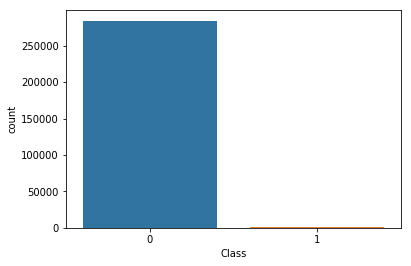

In [24]:
dt = pd.read_csv("creditcard.csv", header=0)
sns.countplot("Class", data=dt)
plt.show()

---
### 3.b

#### Estandarización

In [25]:
dt["nAmount"] = skpp.StandardScaler().fit_transform(dt["Amount"].values.reshape(-1,1))
dt.drop(["Time", "Amount"], axis=1, inplace=True)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,nAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


---
### 3.c

#### Modelo y Matriz de Confusión

In [26]:
def model(model, features_train, features_test, labels_train, labels_test):
    clf = model
    clf.fit(features_train, labels_train.values.ravel())
    pred = clf.predict(features_test)
    
    cnf_matrix = skmt.confusion_matrix(labels_test, pred)
    recall = cnf_matrix[1,1] / (cnf_matrix[1,1] + cnf_matrix[1,0])
    print("The recall for this model is:", recall)
    
    fig = plt.figure(figsize=(6,3))
    print("TP:", cnf_matrix[1,1])
    print("TN:", cnf_matrix[0,0])
    print("FP:", cnf_matrix[0,1])
    print("FN:", cnf_matrix[1,0])
    
    sns.heatmap(cnf_matrix, cmap="coolwarm_r", annot=True, linewidths=0.5)
    plt.title("Confussion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Real Class")
    plt.show()
    
    print()
    print("Classification Report:")
    print(skmt.classification_report(labels_test, pred))
    
    ''' You have to complete this function, ROC Curve is missing '''

---
### 3.d

#### Preparación de los datos

In [27]:
def data_preparation(x):
    x_features = x.iloc[:,x.columns != "Class"]
    x_labels = x.iloc[:,x.columns == "Class"]
    x_train, x_test, y_train, y_test = skms.train_test_split(x_features, x_labels, test_size=0.3)
    
    print("Length of training data: {}".format(len(x_train)))
    print("Length of test data: {}".format(len(x_test)))
    return(x_train,x_test,y_train,y_test)

---
### 3.e

#### Undersample

In [28]:
def undersample(data,times):
    fraud_indices = np.array(data[data.Class==1].index)
    normal_indices = np.array(data[data.Class==0].index)
    
    Count_Normal_transacation = len(data[data["Class"]==0])
    Count_Fraud_transacation = len(data[data["Class"]==1])
    
    Normal_indices_undersample = np.array(
        np.random.choice(
            normal_indices,
            (times*Count_Fraud_transacation),
            replace=False
        )
    )
    
    undersample_data = np.concatenate([fraud_indices,Normal_indices_undersample])
    undersample_data = data.iloc[undersample_data,:]
    
    normal = len(undersample_data[undersample_data.Class==0]) / len(undersample_data["Class"])
    print("The normal transacation proportion is : {}".format(normal))
    
    fraud = len(undersample_data[undersample_data.Class==1]) / len(undersample_data["Class"])
    print("The fraud transacation proportion is : {}".format(fraud))
    
    return(undersample_data)

---
### 3.f

#### Logistic Regression y Undersample

Length of training data: 199364
Length of test data: 85443
The undersample data for 1 proportion

The normal transacation proportion is : 0.5
The fraud transacation proportion is : 0.5

----------------------Validation Set------------------------

The model classification for 1 proportion

Length of training data: 462
Length of test data: 198
The recall for this model is: 0.858695652174
TP: 79
TN: 101
FP: 5
FN: 13


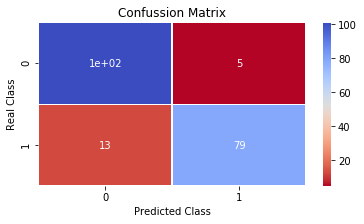


Classification Report:
             precision    recall  f1-score   support

          0       0.89      0.95      0.92       106
          1       0.94      0.86      0.90        92

avg / total       0.91      0.91      0.91       198

--------------------------Testing Set---------------------------
The recall for this model is: 0.888888888889
TP: 144
TN: 82184
FP: 3097
FN: 18


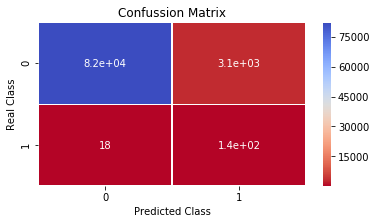


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.96      0.98     85281
          1       0.04      0.89      0.08       162

avg / total       1.00      0.96      0.98     85443

---------------------------------------------------------------
The undersample data for 2 proportion

The normal transacation proportion is : 0.6666666666666666
The fraud transacation proportion is : 0.3333333333333333

----------------------Validation Set------------------------

The model classification for 2 proportion

Length of training data: 693
Length of test data: 297
The recall for this model is: 0.911111111111
TP: 82
TN: 202
FP: 5
FN: 8


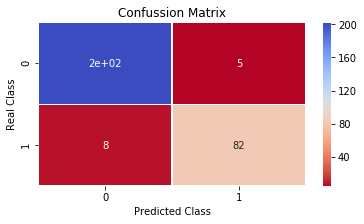


Classification Report:
             precision    recall  f1-score   support

          0       0.96      0.98      0.97       207
          1       0.94      0.91      0.93        90

avg / total       0.96      0.96      0.96       297

--------------------------Testing Set---------------------------
The recall for this model is: 0.895061728395
TP: 145
TN: 82964
FP: 2317
FN: 17


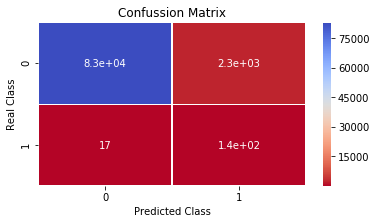


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.97      0.99     85281
          1       0.06      0.90      0.11       162

avg / total       1.00      0.97      0.98     85443

---------------------------------------------------------------
The undersample data for 3 proportion

The normal transacation proportion is : 0.75
The fraud transacation proportion is : 0.25

----------------------Validation Set------------------------

The model classification for 3 proportion

Length of training data: 924
Length of test data: 396
The recall for this model is: 0.848484848485
TP: 84
TN: 291
FP: 6
FN: 15


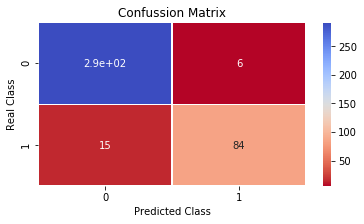


Classification Report:
             precision    recall  f1-score   support

          0       0.95      0.98      0.97       297
          1       0.93      0.85      0.89        99

avg / total       0.95      0.95      0.95       396

--------------------------Testing Set---------------------------
The recall for this model is: 0.858024691358
TP: 139
TN: 84148
FP: 1133
FN: 23


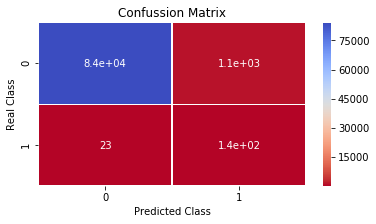


Classification Report:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99     85281
          1       0.11      0.86      0.19       162

avg / total       1.00      0.99      0.99     85443

---------------------------------------------------------------


In [29]:
x_tr, x_ts, y_tr, y_ts = data_preparation(dt)
x_tr["Class"] = y_tr["Class"]
x_tr = x_tr.reset_index(drop=True)

for i in range(1,4):
    print("The undersample data for {} proportion".format(i), end='\n\n')
    Undersample_data = undersample(x_tr,i)
    print()
    print("----------------------Validation Set------------------------", end='\n\n')
    print("The model classification for {} proportion".format(i), end='\n\n')
    
    under_x, under_xt, under_yx, under_yxt = data_preparation(Undersample_data)
    clf = sklm.LogisticRegression()
    model(clf, under_x, under_xt, under_yx, under_yxt)
    print("--------------------------Testing Set---------------------------")
    model(clf, under_x, x_ts, under_yx, y_ts)
    print("---------------------------------------------------------------")

---
### 3.g

#### Oversampling y SMOTE

In [30]:
os = imbos.SMOTE(random_state=0)
os_data_X, os_data_y = os.fit_sample(x_tr,y_tr)

/home/vlizana/u/machine-learning/env/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---

---

---